In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import dicom
import os
import scipy.ndimage
# import matplotlib.pyplot as plt

from skimage import measure, morphology
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

import glob

/Users/ronghang/anaconda/lib/python3.5/site-packages/dicom/__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)


In [2]:
def plot_3d(image, threshold=-300):

    # Position the scan upright,
    # so the head of the patient would be at the top facing the camera
    p = image.transpose(2,1,0)

    verts, faces = measure.marching_cubes(p, threshold)

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Fancy indexing: `verts[faces]` to generate a collection of triangles
    mesh = Poly3DCollection(verts[faces], alpha=0.70)
    face_color = [0.45, 0.45, 0.75]
    mesh.set_facecolor(face_color)
    ax.add_collection3d(mesh)

    ax.set_xlim(0, p.shape[0])
    ax.set_ylim(0, p.shape[1])
    ax.set_zlim(0, p.shape[2])

    plt.show()

In [3]:
filelist = glob.glob('./preprocessed/*.npz')
print(filelist)

['./preprocessed/0015ceb851d7251b8f399e39779d1e7d.npz', './preprocessed/0030a160d58723ff36d73f41b170ec21.npz', './preprocessed/003f41c78e6acfa92430a057ac0b306e.npz', './preprocessed/006b96310a37b36cccb2ab48d10b49a3.npz', './preprocessed/008464bb8521d09a42985dd8add3d0d2.npz']


In [4]:
data_list = [np.load(fname) for fname in filelist]

In [5]:
print(data_list[0].keys())

['pix_resampled', 'spacing', 'segmented_lungs', 'segmented_lungs_fill', 'segmented_lungs_fill_dilated']


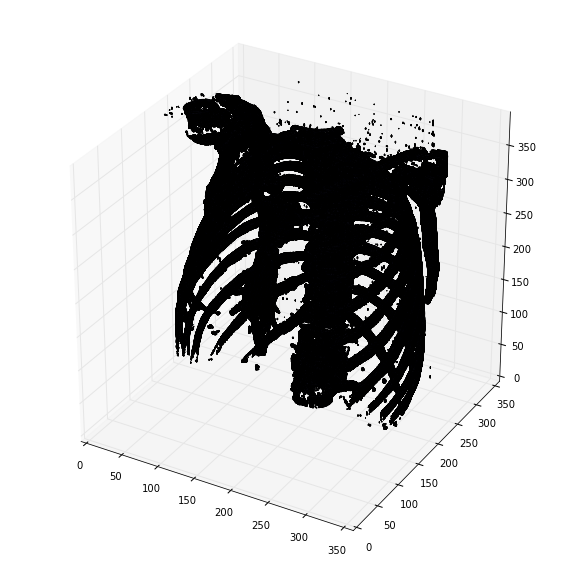

In [6]:
plot_3d(data_list[0]['pix_resampled'], 400)